# BCI Comprehensive Data Alignment

Section 1: Get epochs 

In [6]:
import mne
import numpy as np
from mne.datasets import eegbci
import matplotlib.pyplot as plt
from os import listdir
from mne.channels import make_standard_montage
from BCIAllFunction import BCIFuntions

AllBCIClass = BCIFuntions(numclass = 4, frequency = 250)

raw_gdf = AllBCIClass.GetRawGDF(name= "pipo", condition="offline") #Input data -> 250Hz with 6-32 Hz filtered + CAR

raw_gdf.compute_psd(fmax=60).plot(picks="data")
plt.show()


TypeError: BCIFuntions.__init__() got an unexpected keyword argument 'numclass'

In [ ]:
Epochs = AllBCIClass.GetEpoch(raw_gdf,tmin= -2.0, tmax= 6.0 ,baseline= (-0.5,0.0), event_repeat=True)

Used Annotations descriptions: ['769', '770', '772', '780', '786']
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 120 events and 2001 original time points ...
0 bad epochs dropped


In [ ]:
Epochs

Number of events,120
Events,OVTK_GDF_Left: 30OVTK_GDF_Right: 30OVTK_GDF_Tongue: 30OVTK_GDF_Up: 30
Time range,-2.000 – 6.000 s
Baseline,-0.500 – 0.000 s


Section 2: Apply Data Alignment on RAW data

In [ ]:
labels = Epochs.copy().events[:,-1]  #Get labels 

filtered_epochs = AllBCIClass.butter_bandpass_filter(Epochs.copy().get_data()[:,:,500:1500] ,lowcut = 6, highcut= 32, fs = 250, order = 4) 
filtered_epochs = filtered_epochs * 10e6 #uV to V

Raw_data, EA_data = AllBCIClass.GetRawSet_ComputeEA(filtered_epochs, label=labels)

C:\Users\pipo_\AppData\Local\Temp\ipykernel_25280\246671335.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  filtered_epochs = AllBCIClass.butter_bandpass_filter(Epochs.copy().get_data()[:,:,500:1500] ,lowcut = 6, highcut= 32, fs = 250, order = 4)


Section 3: vistualize raw data with and without EA

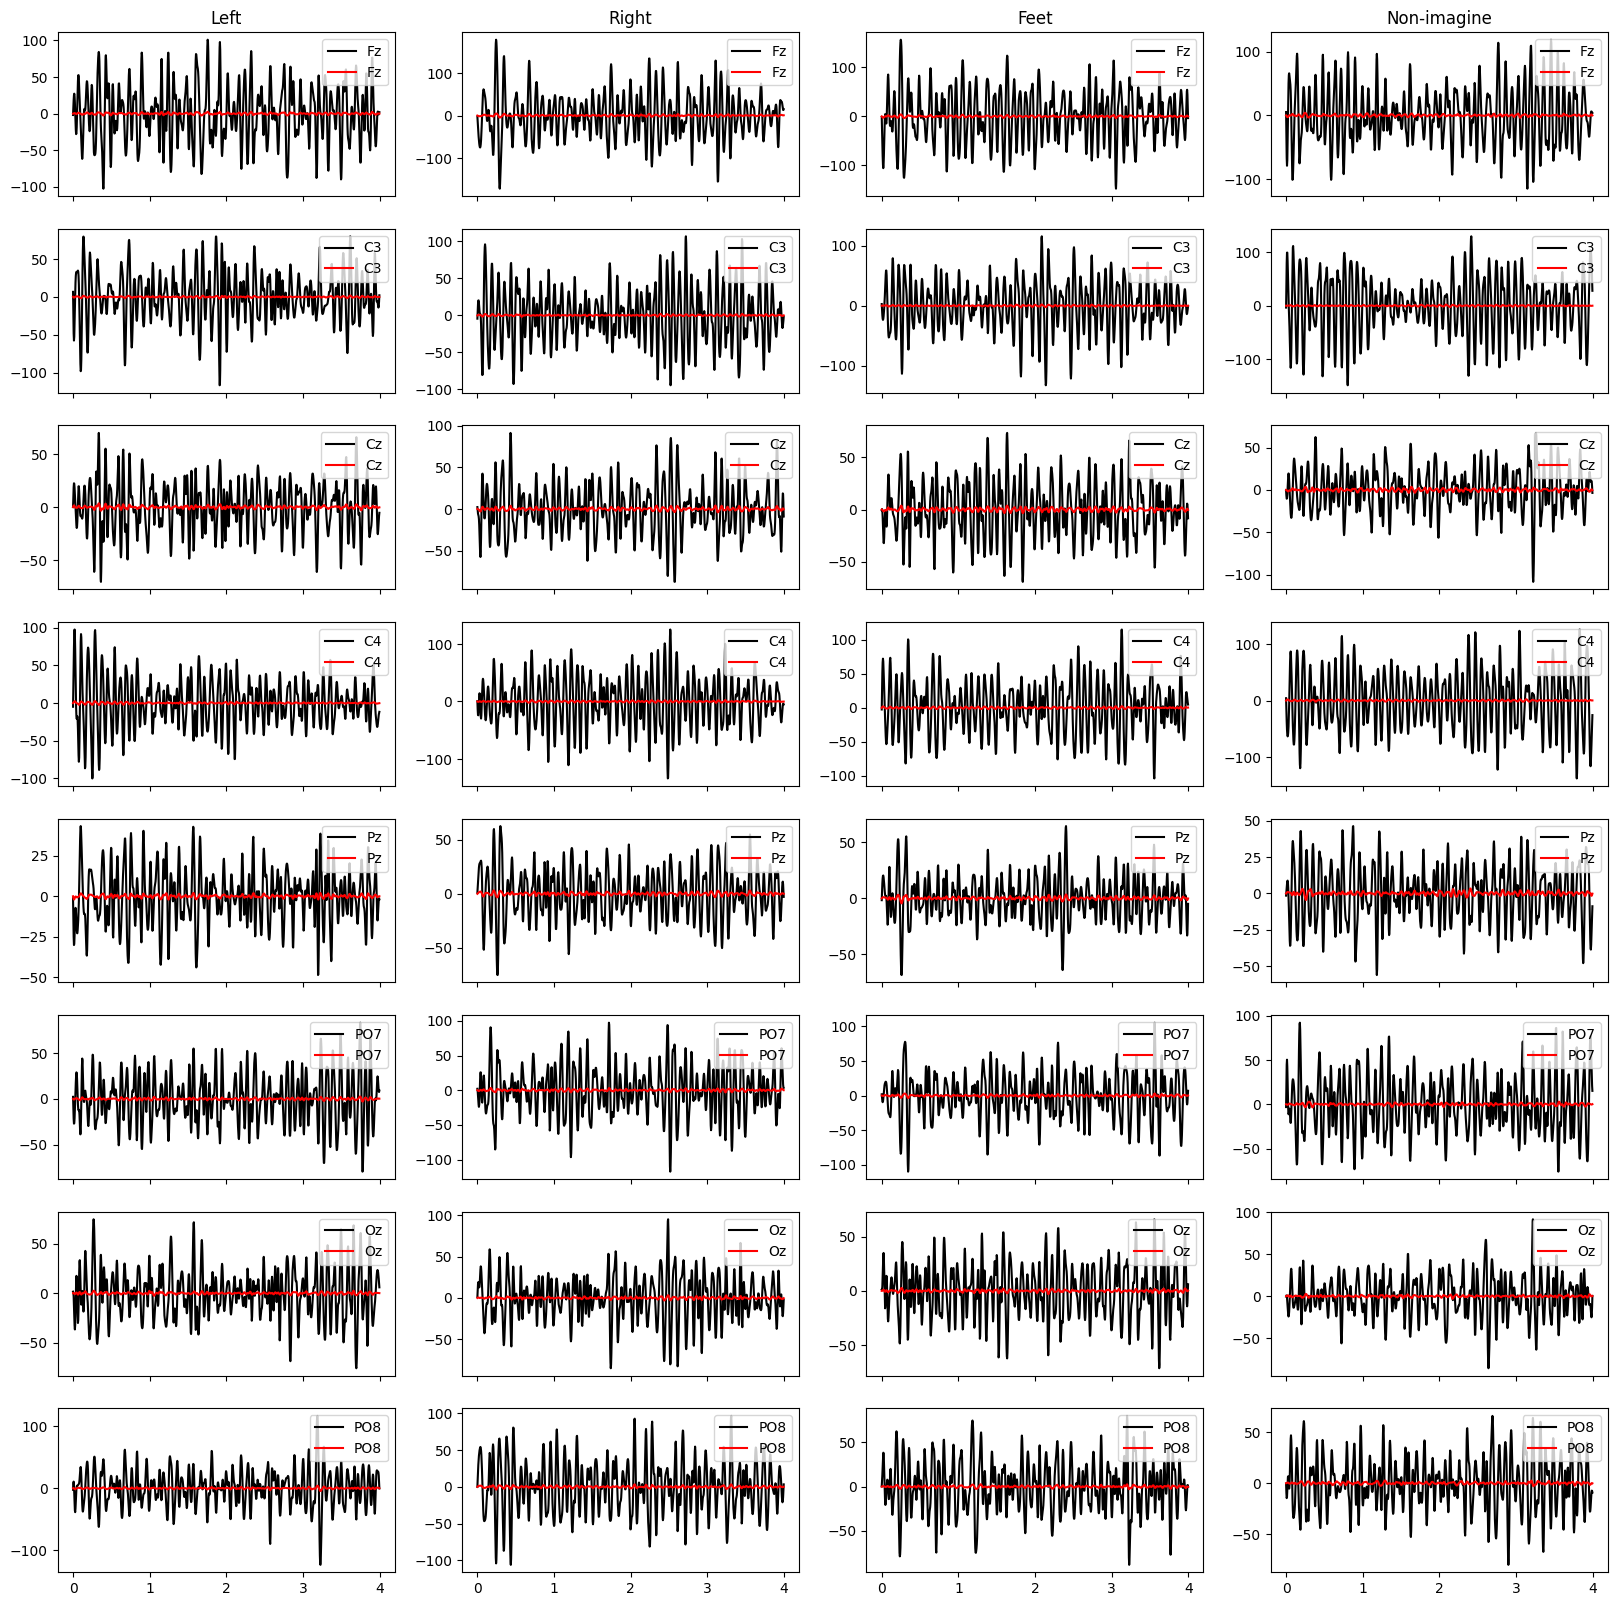

In [ ]:
AllBCIClass.plot_rawEA(Raw_data, EA_data, ch_name=Epochs.ch_names)